In [515]:
import pandas as pd
# Specify the file path
file_path = "C:/Users/Sathish/Desktop/project2/Bird_Monitoring_Data_GRASSLAND.XLSX"

# Read the Excel file with multiple sheets
excel_data = pd.ExcelFile(file_path)

# Get all sheet names
sheet_names = excel_data.sheet_names

# Read data from all sheets into a dictionary
sheets_dict = {sheet: excel_data.parse(sheet) for sheet in sheet_names}

In [516]:
# Example: Convert sheets_dict to a single DataFrame; this will add a new sheet column at the last.
df = pd.concat(
    [df.assign(Sheet=sheet_name) for sheet_name, df in sheets_dict.items()],
    ignore_index=True
)

C:\Users\Sathish\AppData\Local\Temp\ipykernel_3028\499101424.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(


In [517]:
import pandas as pd

# Filter out empty or all-NA DataFrames before concatenation
valid_sheets = {
    name: df for name, df in sheets_dict.items()
    if not df.empty and not df.isna().all().all()
}

# Concatenate with the Sheet name
combined_df = pd.concat(
    [df.assign(Sheet=sheet_name) for sheet_name, df in valid_sheets.items()],
    ignore_index=True
)

In [518]:
df


,Admin_Unit_Code,Sub_Unit_Code,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,...,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Previously_Obs,Initial_Three_Min_Cnt,Sheet
0,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True,ANTI
1,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,False,ANTI
2,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True,ANTI
3,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True,ANTI
4,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,False,True,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True,ANTI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8526,MONO,NaN,MONO-0089,Grassland,2018,2018-05-10,06:35:00,06:46:00,Brian Swimelar,1,...,False,False,19.0,63.0,Partly Cloudy,Light air movement (1-3 mph) smoke drifts,Slight effect on count,False,False,MONO
8527,MONO,NaN,MONO-0089,Grassland,2018,2018-05-10,06:35:00,06:46:00,Brian Swimelar,1,...,False,False,19.0,63.0,Partly Cloudy,Light air movement (1-3 mph) smoke drifts,Slight effect on count,False,False,MONO
8528,MONO,NaN,MONO-0089,Grassland,2018,2018-05-10,06:35:00,06:46:00,Brian Swimelar,1,...,False,False,19.0,63.0,Partly Cloudy,Light air movement (1-3 mph) smoke drifts,Slight effect on count,False,False,MONO
8529,MONO,NaN,MONO-0089,Grassland,2018,2018-05-10,06:35:00,06:46:00,Brian Swimelar,1,...,False,False,19.0,63.0,Partly Cloudy,Light air movement (1-3 mph) smoke drifts,Slight effect on count,False,False,MONO


In [519]:
# later u can Drop the 'Sheet' column
df = df.drop(columns=['Sheet'])


In [520]:
df['Month'] = df['Date'].dt.month
month_map = {5: 'May', 6: 'June', 7: 'July'}
df['month_name'] = df['Month'].map(month_map)
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='%H:%M:%S').dt.time
df['End_Time'] = pd.to_datetime(df['End_Time'], format='%H:%M:%S').dt.time
df['Visit'] = df['Visit'].astype(int)

In [521]:
#df['PIF_Watchlist_Status'] = df['PIF_Watchlist_Status'].map({'True': True,'False': False}).astype('bool')
#df['Regional_Stewardship_Status'] = df['Regional_Stewardship_Status'].map({'True': True,'False': False}).astype('bool')
df['Initial_Three_Min_Cnt'] = df['Initial_Three_Min_Cnt'].astype(str).map({'True': True,'False': False}).astype('bool')

In [522]:
df['Regional_Stewardship_Status'] = (df['Regional_Stewardship_Status'].astype(str).str.strip().map({'True': True, 'False': False}))


In [526]:
df['PIF_Watchlist_Status'] = (df['PIF_Watchlist_Status'].astype(str).str.strip().map({'True': True, 'False': False}))

In [535]:
df['PIF_Watchlist_Status'].unique()

array([False,  True])

In [537]:
split_1 = df['Wind'].str.split('(', n=1, expand=True)
split_2 = split_1[1].str.split(')', n=1, expand=True)
df['Wind_Desc'] = split_1[0].str.strip()
df['Wind_Speed'] = split_2[0].str.strip()
df['Wind_Effect'] = split_2[1].str.strip(' ,')  
print(df[['Wind_Desc', 'Wind_Speed', 'Wind_Effect']])
df['Wind_Label'] = df['Wind_Desc'] + ' (' + df['Wind_Speed'] + ')'
df = df.drop(['Wind_Desc', 'Wind_Speed','Wind'], axis=1)

               Wind_Desc Wind_Speed        Wind_Effect
0           Light breeze    4-7 mph  wind felt on face
1           Light breeze    4-7 mph  wind felt on face
2           Light breeze    4-7 mph  wind felt on face
3           Light breeze    4-7 mph  wind felt on face
4           Light breeze    4-7 mph  wind felt on face
...                  ...        ...                ...
8526  Light air movement    1-3 mph       smoke drifts
8527  Light air movement    1-3 mph       smoke drifts
8528  Light air movement    1-3 mph       smoke drifts
8529  Light air movement    1-3 mph       smoke drifts
8530  Light air movement    1-3 mph       smoke drifts

[8531 rows x 3 columns]


In [539]:
df = df.drop(columns=['Sub_Unit_Code'])

In [541]:
df = df.dropna(subset=['AcceptedTSN','TaxonCode','ID_Method'])

In [543]:
df['Distance'] = df['Distance'].ffill()

In [545]:
df['Wind_Label'].unique()

array(['Light breeze (4-7 mph)', 'Light air movement (1-3 mph)',
       'Calm (< 1 mph)', 'Gentle breeze (8-12 mph)'], dtype=object)

In [547]:
df.isna().sum()

Admin_Unit_Code                0
Plot_Name                      0
Location_Type                  0
Year                           0
Date                           0
Start_Time                     0
End_Time                       0
Observer                       0
Visit                          0
Interval_Length                0
ID_Method                      0
Distance                       0
Flyover_Observed               0
Sex                            0
Common_Name                    0
Scientific_Name                0
AcceptedTSN                    0
TaxonCode                      0
AOU_Code                       0
PIF_Watchlist_Status           0
Regional_Stewardship_Status    0
Temperature                    0
Humidity                       0
Sky                            0
Disturbance                    0
Previously_Obs                 0
Initial_Three_Min_Cnt          0
Month                          0
month_name                     0
Wind_Effect                    0
Wind_Label

In [549]:
df.shape

(8504, 31)

In [551]:
df.dtypes


Admin_Unit_Code                        object
Plot_Name                              object
Location_Type                          object
Year                                   object
Date                           datetime64[ns]
Start_Time                             object
End_Time                               object
Observer                               object
Visit                                   int32
Interval_Length                        object
ID_Method                              object
Distance                               object
Flyover_Observed                       object
Sex                                    object
Common_Name                            object
Scientific_Name                        object
AcceptedTSN                           float64
TaxonCode                             float64
AOU_Code                               object
PIF_Watchlist_Status                     bool
Regional_Stewardship_Status              bool
Temperature                       

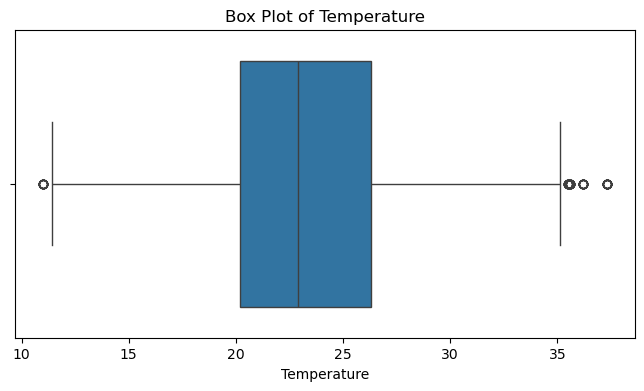

In [553]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Temperature'])
plt.title('Box Plot of Temperature')
plt.show()

In [555]:
upper_limit = df['Temperature'].mean() + 3*df['Temperature'].std()
lower_limit = df['Temperature'].mean() - 3*df['Temperature'].std()
print(upper_limit)
lower_limit

37.36963056066699


9.17865262917655

In [557]:
df['Temperature'] = np.where(
    df['Temperature']>upper_limit,
    upper_limit,
    np.where(
        df['Temperature']<lower_limit,
        lower_limit,
        df['Temperature']
        )
 )
print(df['Temperature'].min())
df['Temperature'].max()

11.0


37.2999992370605

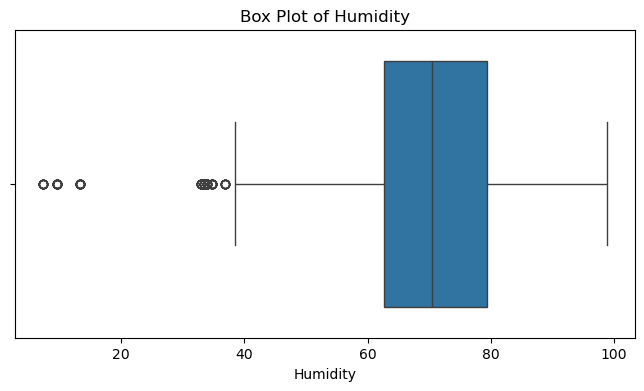

In [559]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Humidity'])
plt.title('Box Plot of Humidity')
plt.show()

In [561]:
df['Humidity'].max()

98.8000030517578

In [563]:
df['Humidity'].min()

7.30000019073486

In [565]:
upper_limit = df['Humidity'].mean() + 3*combined_df['Humidity'].std()
lower_limit = df['Humidity'].mean() - 3*combined_df['Humidity'].std()
print(upper_limit)
lower_limit

110.36859426005248


28.858005093224648

In [567]:
df['Humidity'] = np.where(
    df['Humidity']>upper_limit,
    upper_limit,
    np.where(
        df['Humidity']<lower_limit,
        lower_limit,
        df['Humidity']
    )
)

In [580]:
df.to_csv('grassland_bird.csv', index=False)

In [571]:
df1=pd.read_csv('grassland_bird.csv')

# 

In [574]:
df1

,Admin_Unit_Code,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,Interval_Length,...,Temperature,Humidity,Sky,Disturbance,Previously_Obs,Initial_Three_Min_Cnt,Month,month_name,Wind_Effect,Wind_Label
0,ANTI,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,0-2.5 min,...,20.0,79.0,Cloudy/Overcast,Slight effect on count,False,True,5,May,wind felt on face,Light breeze (4-7 mph)
1,ANTI,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,7.5 - 10 min,...,20.0,79.0,Cloudy/Overcast,Slight effect on count,False,False,5,May,wind felt on face,Light breeze (4-7 mph)
2,ANTI,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,0-2.5 min,...,20.0,79.0,Cloudy/Overcast,Slight effect on count,False,True,5,May,wind felt on face,Light breeze (4-7 mph)
3,ANTI,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,0-2.5 min,...,20.0,79.0,Cloudy/Overcast,Slight effect on count,False,True,5,May,wind felt on face,Light breeze (4-7 mph)
4,ANTI,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,0-2.5 min,...,20.0,79.0,Cloudy/Overcast,Slight effect on count,False,True,5,May,wind felt on face,Light breeze (4-7 mph)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8499,MONO,MONO-0089,Grassland,2018,2018-05-10,06:35:00,06:46:00,Brian Swimelar,1,2.5 - 5 min,...,19.0,63.0,Partly Cloudy,Slight effect on count,False,False,5,May,smoke drifts,Light air movement (1-3 mph)
8500,MONO,MONO-0089,Grassland,2018,2018-05-10,06:35:00,06:46:00,Brian Swimelar,1,2.5 - 5 min,...,19.0,63.0,Partly Cloudy,Slight effect on count,False,False,5,May,smoke drifts,Light air movement (1-3 mph)
8501,MONO,MONO-0089,Grassland,2018,2018-05-10,06:35:00,06:46:00,Brian Swimelar,1,2.5 - 5 min,...,19.0,63.0,Partly Cloudy,Slight effect on count,False,False,5,May,smoke drifts,Light air movement (1-3 mph)
8502,MONO,MONO-0089,Grassland,2018,2018-05-10,06:35:00,06:46:00,Brian Swimelar,1,2.5 - 5 min,...,19.0,63.0,Partly Cloudy,Slight effect on count,False,False,5,May,smoke drifts,Light air movement (1-3 mph)


In [576]:
df1.isna().sum()

Admin_Unit_Code                0
Plot_Name                      0
Location_Type                  0
Year                           0
Date                           0
Start_Time                     0
End_Time                       0
Observer                       0
Visit                          0
Interval_Length                0
ID_Method                      0
Distance                       0
Flyover_Observed               0
Sex                            0
Common_Name                    0
Scientific_Name                0
AcceptedTSN                    0
TaxonCode                      0
AOU_Code                       0
PIF_Watchlist_Status           0
Regional_Stewardship_Status    0
Temperature                    0
Humidity                       0
Sky                            0
Disturbance                    0
Previously_Obs                 0
Initial_Three_Min_Cnt          0
Month                          0
month_name                     0
Wind_Effect                    0
Wind_Label

In [578]:
df1.dtypes

Admin_Unit_Code                 object
Plot_Name                       object
Location_Type                   object
Year                             int64
Date                            object
Start_Time                      object
End_Time                        object
Observer                        object
Visit                            int64
Interval_Length                 object
ID_Method                       object
Distance                        object
Flyover_Observed                  bool
Sex                             object
Common_Name                     object
Scientific_Name                 object
AcceptedTSN                    float64
TaxonCode                      float64
AOU_Code                        object
PIF_Watchlist_Status              bool
Regional_Stewardship_Status       bool
Temperature                    float64
Humidity                       float64
Sky                             object
Disturbance                     object
Previously_Obs           